# Problema 8.12

Un sistema de control utiliza un PI y se representa en el diagrama de bloques de la figura:

![prob812](./img/prob812.svg)

Las funciones de transferencia son las siguientes:

$$\begin{align}
    G_v &= k_v\\
    G_p &= \frac{1}{(s^2+s+2)(5s+2)}\\
    G_{m_1} &= \mathrm{e}^{-0.8s}\\
    G_{m_2} &= k_1
\end{align}$$

siendo $G_c$ la correspondiente a un controlador PI.

Las constantes de las funciones de transferenciason: $K_c$ = 10, $\tau_I$ = 1 min, $k_1$ = 0.25 y $k_v$ = 0.5.

1. Determinar los márgenes de ganancia y de fase.

2. Mostrar si el sistema es o no estable.

3. ¿Qué influencia tendría la introducción en el controlador de una acción derivativa con $\tau_D$ = 1 min.

---

**Solución**

a\) Para resolver este problema se recurrirá a los diagramas de Bode. La función de transferencia de lazo abierto de este sistema es:

$$G_{OL} = G_c G_v G_p G_{m_1} G_{m_2} = K_c  \left( 1 +
   \frac{1}{\tau_I s} \right) k_v  \frac{1}{(s^2 + s + 2)  (5 s + 2)}
   \mathrm{e}^{- 0.8 s} k_1$$
   
Sustituyendo los valores de las constantes:

$$G_{OL} = 4 \left( 1 + \frac{1}{s} \right)  \frac{1}{s^2 + s + 2} 
   \frac{1}{5 s + 2} \mathrm{e}^{- 0.8 s} = 4 \left( 1 + \frac{1}{s} \right) 
   \frac{0.5}{0.5 s^2 + 0.5 s + 1}  \frac{0.5}{2.5 s + 1} \mathrm{e}^{- 0.8 s}$$
   
La función de transferencia del proceso $G_p$ se puede descomponer de manera trivial en el producto de la función de transferencia de un proceso de primer orden y otro de segundo orden. Observar que dichas funciones de transferencia se ha multiplicado y dividido por el término independiente del denominador para obtener las funciones detransferencia de la manera acostumbrada. Si no se hace este paso, fácilmente se pueden obtener constantes de tiempo o coeficientes de amortiguamiento erroneas.

A partir de la función de transferencia de lazo abierto se obtiene la razón de amplitudes y el desfase necesario para obtener el diagrama de Bode:

$$RA_{OL} = 4 \sqrt{1 + \frac{1}{\omega^2}} 
   \frac{0.5}{\sqrt{(1 - 0.5^2 \omega^2)^2 + (0.5 \omega)^2}} 
   \frac{0.5}{\sqrt{2.5^2 \omega^2 + 1}} 1$$
   
$$\varphi = \mathrm{atan} \left( - \frac{1}{\omega} \right) + \mathrm{atan}
   \left( - \frac{0.5 \omega}{1 - 0.5^2 \omega^2} \right) + \mathrm{atan} (- 2.5
   \omega) - 0.8 \omega$$ 
   
Aunque podríamos dibujar el diagrama de Bode con las funciones anteriores, es una tarea un poco tediosa. A continuación se muestra el diagrama de Bode dibujado utilizando _SymPy_. Para su representación se cargamos el siguiente fichero la función `bode`:

In [1]:
include("../clasecontrol.jl")

bode

La ayuda de esta función se puede obtener escribiendo:

In [2]:
?bode

search: bode Bode BoundsError isblockdev @boundscheck LineNumberNode baremodule



**bode(Gol; wmin=1e-1, wmax=1e1, points=100, co=false, ra1=false, RAlabel="RA")**

Representación del diagrama de Bode de la función de transferencia *Gol*.

Parámetros:

  * `Gol`: Función de transferencia dependiente de *s*
  * `wmin`: Frecuencia angular mínima a representar
  * `wmax`: Frecuencia angular máxima a representar
  * `points`: Número de puntos a representar
  * `co`: Calcula y representa la frecuencia de cruce
  * `ra1`: Calcula y representa la frecuencia que hace que *RA* = 1
  * `RAlabel`: Etiqueta del gráfico de RA en el diagrama de Bode

Ejemplo:

`salida = bode(20*(s+1)/s/(s+5)/(s^2+2s+10); wmax=10, co=true, ra1=true)`

El resultado se da como un diccionario. Para obtener los valores del ejemplo:

  * Frecuencia de cruce: `salida["wco"]`
  * Frecuencia para *RA* = 1: `salida["phi1"]`


Las funciones de transferenica del lazo de control nos permiten calcular la función de transferencia de lazo abierto ($G_{OL}$):

In [3]:
Gc = 10*(1+1/s)
Gv = 0.5
Gp = 1/((s^2+s+2)*(5s+2))
Gm1 = exp(-0.8s)
Gm2 = 0.25

Gol = Gc*Gv*Gp*Gm1*Gm2

     ⎛      5.0⎞  -0.8⋅s
0.25⋅⎜5.0 + ───⎟⋅ℯ      
     ⎝       s ⎠        
────────────────────────
           ⎛ 2        ⎞ 
 (5⋅s + 2)⋅⎝s  + s + 2⎠ 

A continuación calculamos el diagrama de Bode para valores de frecuencia angular entre 0.1 y 1. Además calculamos la frecuencia de cruce y la frecuencia que hace que la razón de amplitudes valga la unidad ($\omega_1$):

In [4]:
salida = bode(Gol; wmax=1, co=true, ra1=true);

El siguiente paso consiste en mostrar el diagrama de Bode:

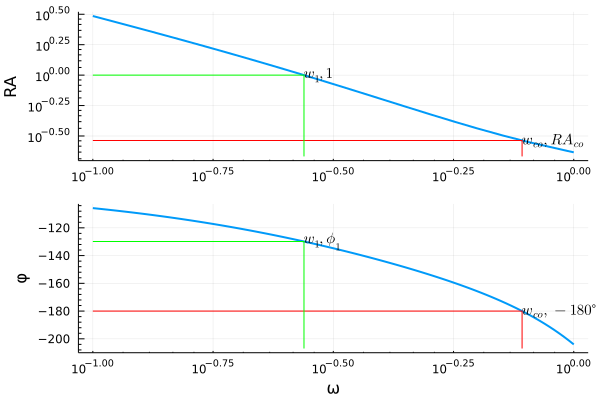

In [5]:
salida.fig

Obtenemos un valor de frecuencia de cruce:


In [6]:
round(salida.wco, sigdigits=3)

0.781

lo que supone una valor de razón crítica de:

In [7]:
RAcr = salida.RAco
round(RAcr, sigdigits=3)

0.29

Como consecuencia el margen de ganancia, $MG=\frac{1}{RA_{cr}}$, será:

In [8]:
MG = 1/RAcr
round(MG, sigdigits=3)

3.44

Para obtener el margen de fase, necesitamos el valor del desfase para el que la razón de amplitudes toma el valor de la unidad, $\varphi_1$. Es decir:

In [9]:
MF = 180 + salida.phi1*180/pi

50.15353175315707

b) El sistema es **estable** ya que la razón de amplitudes crítica es
superior a la unidad.

c\) Al añadir al controlador una acción derivativa ($\tau_D = 1 \min$) cambia la función de transferencia de lazo abierto del bucle de control:

$$G_{OL} = 4 \left( 1 + \frac{1}{s} + 1 s \right) \frac{0.5}{0.5 s^2 +
   0.5 s + 1}  \frac{0.5}{2.5 s + 1} \mathrm{e}^{- 0.8 s}$$
   

In [10]:
Gc = 10*(1+1/s + 1*s)
Gv = 0.5
Gp = 1/((s^2+s+2)*(5s+2))
Gm1 = exp(-0.8s)
Gm2 = 0.25

Gol = Gc*Gv*Gp*Gm1*Gm2

     ⎛              5.0⎞  -0.8⋅s
0.25⋅⎜5.0⋅s + 5.0 + ───⎟⋅ℯ      
     ⎝               s ⎠        
────────────────────────────────
               ⎛ 2        ⎞     
     (5⋅s + 2)⋅⎝s  + s + 2⎠     

El nuevo diagrama de Bode es:

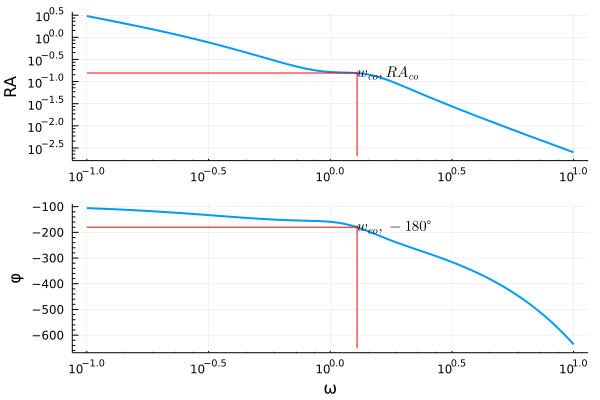

In [11]:
salida_c = bode(Gol; wmax=10, co=true);
salida_c.fig

Al añadir la acción derivativa, la frecuencia de cruce y la razón crítica pasan a tomar los siquientes valores:

In [12]:
round(salida_c.wco, sigdigits=3)

1.29

In [13]:
RAcr = salida_c.RAco
round(RAcr, sigdigits=3)

0.156

Lo que significa que el margen de ganacia es:

In [14]:
MG = 1/RAcr
round(MG, sigdigits=3)

6.4

Todo esto supone que el lazo de control con el controlador PID está más alejado de la zona de inestabilidad, lo que supone que se tratará de un sistema más robusto. Será mucho más dificil que el sistema entre en la zona inestable debido a un error en la estimación de alguna de las ganancias o del retraso, por ejemplo.